In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

In [2]:
data_table = pd.read_csv('iris.csv', names =['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower'])

In [3]:
iris_data_multiclass = pd.read_csv('iris_multiclasse.csv', names =['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower1','flower2','flower3'])

In [4]:
def normalization(matrix, vector):
    #Mean calculation
    mVector = np.mean(vector, axis=0)
    mMatrix = np.mean(matrix, axis=0)
    
    #Standard deviation
    stdVector = np.std(vector, axis = 0)
    stdMatrix = np.std(matrix, axis = 0)
     
    #Normalization of data
    vector = (vector - mVector)/stdVector
    matrix = (matrix - mMatrix)/stdMatrix
    
    return matrix, vector

In [5]:
def predict_logistic_regression_binary(matrix_x, w):
    
    predictions = []
    matrix_x = np.insert(matrix_x, 0, 1, axis =1)
    
    for i in range(matrix_x.shape[0]):
        predictions.append(round(sigmoide(matrix_x[i].dot(w))))
   
    return predictions

In [6]:
def predict_multiclass_logistic_regression(matrix_x_multiclass, w):
    
    matrix_x_multiclass = np.insert(matrix_x_multiclass, 0, 1, axis =1)
    
    size = (matrix_x_multiclass.shape[0], w.shape[0])
    predictions = np.ones(size, dtype=float)
    
    for k in range(w.shape[0]):   
        for i in range(matrix_x_multiclass.shape[0]):
            num = np.exp(w[k].dot(matrix_x_multiclass[i]))
            sum_ = 0
            for j in range(w.shape[0]):
                sum_ = sum_ + np.exp(w[j].dot(matrix_x_multiclass[i]))
            predictions[i][k] = num/sum_

    for i in range(predictions.shape[0]):
        index = np.argmax(predictions[i], axis=0)
        for j in range(len(predictions[i])):
            if(j == index):
                predictions[i][index] = 1.0
            else:
                predictions[i][j] = 0.0
    
    return predictions

In [7]:
def plot_cost(mse):
    plt.plot(list(range(0, len(mse))), [item[0] for item in mse])
    plt.show()

## Binary logistic regression

In [8]:
matrix_x = np.array(data_table[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
vector_y = np.array(data_table['flower'])

In [9]:
matrix_x, vector_y = normalization(matrix_x, vector_y)

In [10]:
def sigmoide(z):
    return 1 / (1 + np.exp(-z))

In [11]:
def gradient_descent(matrix_x, vector_y, epochs, alpha):
    matrix_x = np.insert(matrix_x, 0, 1, axis =1)
    w_matrix = np.ones((matrix_x.shape[1],), dtype=float)
    y_predicted = matrix_x.dot(w_matrix)
    mse = []
    for epoch in range(epochs):
        somatorio = 0
        for i in range(matrix_x.shape[0]):
            somatorio += (vector_y[i] - sigmoide(y_predicted[i])) * matrix_x[i]

        mse.append((-1/matrix_x.shape[0]) * somatorio)
        w_matrix = w_matrix + (alpha/matrix_x.shape[0])*somatorio
        y_predicted = matrix_x.dot(w_matrix)

    return w_matrix, mse

In [12]:
w_gd, mse = gradient_descent(matrix_x, vector_y, 10000, 0.001)

In [13]:
w_gd

array([-3.91003605,  4.57163632, -2.83945175,  6.0195785 ,  5.98391617])

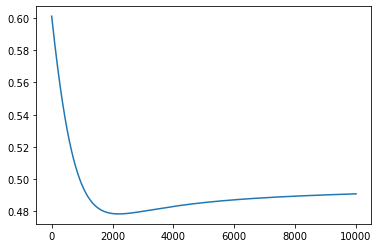

In [14]:
plot_cost(mse)

In [15]:
predctions_gd = predict_logistic_regression_binary(matrix_x, w_gd)

In [16]:
def stochastic_gradient_descent(matrix_x, vector_y, epochs, alpha):
    matrix_x = np.insert(matrix_x, 0, 1, axis =1)
    w_matrix = np.ones((matrix_x.shape[1],), dtype=float)
    y_predicted = matrix_x.dot(w_matrix)
    data =np.append(matrix_x, np.split(vector_y, matrix_x.shape[0], axis=0), axis=1)
    mse = []

    for epoch in range(epochs):
        erro = 0
        somatorio = 0
        for i in range(matrix_x.shape[0]):
            w_matrix  = w_matrix + alpha * (vector_y[i] - sigmoide(y_predicted[i])) * matrix_x[i]
            somatorio += (vector_y[i] - sigmoide(y_predicted[i])) * matrix_x[i]
        
        mse.append((-1/matrix_x.shape[0]) * somatorio)        
        data = np.random.permutation(data)
        matrix_x = data[: ,0:matrix_x.shape[1]]
        vector_y = data[:,matrix_x.shape[1]]
        
        y_predicted = matrix_x.dot(w_matrix)  
    
    return w_matrix, mse

In [17]:
w_gde, mse = stochastic_gradient_descent(matrix_x, vector_y, 10000, 0.001)

In [18]:
w_gde

array([-498.47703627,  364.70980605, -342.06964503,  486.27425106,
        481.44881975])

In [19]:
predctions_gde = predict_logistic_regression_binary(matrix_x, w_gd)

## Multiclass logistic regression

In [20]:
matrix_x_multiclass = np.array(iris_data_multiclass[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
vector_y_multiclass = np.array(iris_data_multiclass[['flower1', 'flower2', 'flower3']])

In [21]:
matrix_x_multiclass, vector_y_multiclass = normalization(matrix_x_multiclass, vector_y_multiclass)

In [22]:
def gradient_descent_multiclasse(matrix_x, vector_y, epochs, alpha):
    
    matrix_x = np.insert(matrix_x, 0, 1, axis =1)
    
    size = (vector_y.shape[1], matrix_x.shape[1])
    w_matrix = np.ones(size, dtype=float)

    mse = []
    for k in range(w_matrix.shape[0]):  
        for epoch in range(epochs):
            somatorio = 0
            for i in range(matrix_x.shape[0]):
                _sum = 0
                for j in range(w_matrix.shape[0]):
                    _sum += np.exp(w_matrix[j].dot(matrix_x[i]))
                
                err = np.exp(w_matrix[k].dot(matrix_x[i]))/_sum
                somatorio += (vector_y[i][k] - err) * matrix_x[i]
            
            mse.append((-1/matrix_x.shape[0]) * somatorio)
            w_matrix[k] = w_matrix[k] + (alpha/matrix_x.shape[0])*somatorio

    return w_matrix, mse

In [23]:
w_gd_m, mse = gradient_descent_multiclasse(matrix_x_multiclass, vector_y_multiclass, 10000, 0.01)

In [24]:
w_gd_m

array([[-32.43258678, -37.07709576,  32.77808385, -48.05638174,
        -46.1842269 ],
       [-21.05575389,   3.25982491, -20.42469787,   8.55694086,
          2.72640771],
       [-45.15104259,  26.79114703,  -7.78928992,  34.28823158,
         38.36118226]])

In [25]:
predictions_gd_m = predict_multiclass_logistic_regression(matrix_x_multiclass, w_gd_m)

In [26]:
def stochastic_gradient_descent_multiclass(matrix_x, vector_y, epochs, alpha):
    
    matrix_x = np.insert(matrix_x, 0, 1, axis =1)

    size = (vector_y.shape[1], matrix_x.shape[1])    
    w_matrix = np.ones(size, dtype=float)
    #y_chapeu = matrix_x.dot(w_matrix)
    #data =np.append(matrix_x, np.split(vector_y, matrix_x.shape[0], axis=0), axis=1)

    data =np.append(matrix_x, vector_y, axis=1)
    
    mse = []

    for k in range(w_matrix.shape[0]):
        for epoch in range(epochs):
            #somatorio = 0
            for i in range(matrix_x.shape[0]):
                _sum = 0
                for j in range(w_matrix.shape[0]):
                    _sum += np.exp(w_matrix[j].dot(matrix_x[i]))
        
                err = np.exp(w_matrix[k].dot(matrix_x[i]))/_sum
                
                w_matrix[k] = w_matrix[k] + alpha * (vector_y[i][k] - err) * matrix_x[i]
                #somatorio += (vector_y[i] - sigmoide(y_chapeu[i])) * matrix_x[i]

            #mse.append((-1/matrix_x.shape[0]) * somatorio)        
            data = np.random.permutation(data)
            matrix_x = data[: ,0:matrix_x.shape[1]]
            vector_y = data[:,matrix_x.shape[1]:]
                
    return w_matrix, mse

In [27]:
w_gde_m, mse = stochastic_gradient_descent_multiclass(matrix_x_multiclass, vector_y_multiclass, 10000, 0.0001)

In [28]:
w_gde_m

array([[-49.09905644, -56.03708188,  48.5186733 , -72.44134167,
        -69.63948373],
       [-31.74323999,   4.43014485, -30.74180019,  12.2314027 ,
          3.57584481],
       [-68.26583145,  39.6378849 , -12.1395466 ,  50.87375559,
         56.98500333]])

In [29]:
predictions_gde_m = predict_multiclass_logistic_regression(matrix_x_multiclass, w_gde_m)